In [ ]:
# base on : https://www.kaggle.com/kgxiao/top2-5-feature-processing-and-selection-model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
sns.set_theme()

In [5]:
df_train = pd.read_csv('./input/train.csv')
df_test = pd.read_csv('./input/test.csv')
data = df_train.append(df_test)

In [22]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# EDA

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
df_train.duplicated().sum()

0

In [10]:
print("Training set size",len(df_train))
print("Test set size",len(df_train))

Training set size 891
Test set size 891


In [11]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


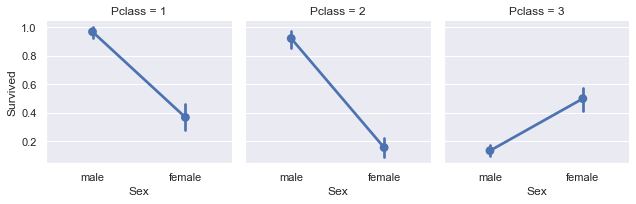

In [12]:
g = sns.FacetGrid(data[:891], col="Pclass")
g.map_dataframe(sns.pointplot,x="Sex",y="Survived")

- 생존율이 1,2 클래스에서는 남성이 우월하게 높았지만 클래스 3에서는 여성의 생존률이 남성의 생존율보다 높다.

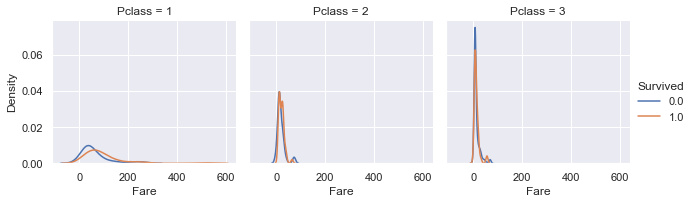

In [13]:
g = sns.FacetGrid(data[:891], col="Pclass", hue="Survived")
g.map_dataframe(sns.kdeplot,x="Fare")
g.add_legend()

- 우리는 1등급 사람들의 운임 분포가 상대적으로 평평하고 높은 운임이 있는 것을 확인했는데, 이는 운임이 오른쪽으로 심하게 치우쳐 있음을 보여줍니다.

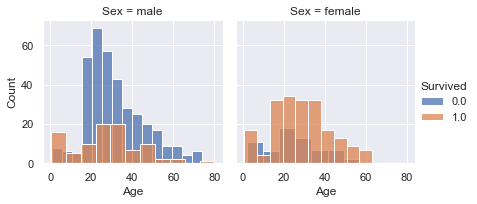

In [14]:
g = sns.FacetGrid(data[:891], col="Sex", hue="Survived")
g.map_dataframe(sns.histplot,x="Age")
g.add_legend()

- 남자든 여자든 생존하는 어린이나 미성년자의 비율은 상당히 높다. 
- 전체적인 관점에서 보면 여성의 생존 비율이 남성보다 높다.

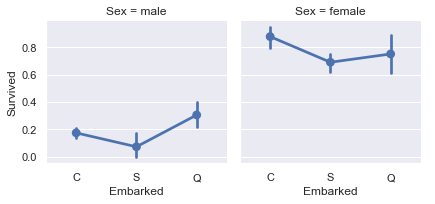

In [15]:
g = sns.FacetGrid(data[:891], col="Sex")
g.map_dataframe(sns.pointplot, x="Embarked", y="Survived")
g.add_legend()

- 승선항에서의 생존율은 비교적 평탄하다.

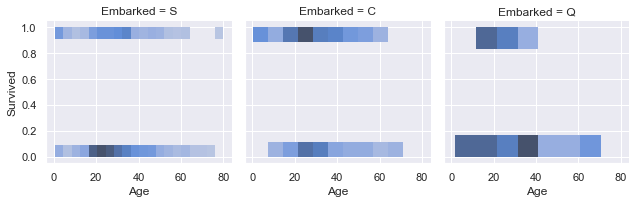

In [16]:
g = sns.FacetGrid(data[:891], col = "Embarked")
g.map_dataframe(sns.histplot, x="Age", y="Survived")

- C항의 생존자들은 20대에 치중되어있다.
- S항의 사망자들은 20대에 치중되어있다.
- Q항의 사망자는 35세 전후에 있다.

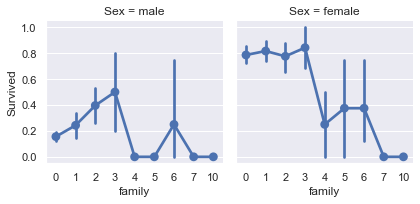

In [17]:
data["family"] = data["Parch"] + data["SibSp"]
data = data.drop(columns=["Parch","SibSp"]) # delete Parch and SibSp

g = sns.FacetGrid(data[:891], col="Sex")
g.map_dataframe(sns.pointplot, x="family", y="Survived")

- 혼자 여행하거나 가족/친구와 함께 7명 이상일 경우 생존율이 매우 낮다.남성이든 여성이든 상관없이 세 사람이 생존율이 가장 높다.
- 가족의 수 또한 생존에 중요한 요소임을 보여준다.

# Feature Engineering

In [18]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=3)
data["Age"] = knn.fit_transform(data["Age"].values.reshape(-1,1)).ravel()

In [19]:
data["Fare"] = data["Fare"].fillna(data[:891]["Fare"].mode()[0])
data["Embarked"] = data["Embarked"].fillna(data[:891]["Embarked"].mode()[0])

In [24]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [25]:
import re
data["Ticket_num"] = data["Ticket"].apply(lambda x:"".join(re.findall(r"\d+",x)))
data["Name_last"] = data["Name"].apply(lambda x:x.split(",",1)[0])

In [26]:
Def = 0.5
data["family_survived"] = Def

da_group = data.groupby(["Name_last","Fare"])

for group, all_data in da_group:
    if (len(all_data) >= 1):
        for index, row in all_data.iterrows():
            if (row['family_survived'] == 0) or (row['family_survived'] == 0.5):
                surviv_max = all_data.drop(index)['Survived'].max()
                surviv_min = all_data.drop(index)['Survived'].min()
                ids = row['PassengerId']
                if (surviv_max == 1.0):
                    data.loc[data['PassengerId'] == ids, 'family_survived'] = 1
                elif (surviv_min==0.0):
                    data.loc[data['PassengerId'] == ids, 'family_survived'] = 0
                    
print("family survival:", data.loc[data['family_survived'] == 1].shape[0])

family survival: 218


In [27]:
da_group = data[["PassengerId","Name_last","Survived","family","Fare","Ticket_num"]].groupby(["Name_last","Ticket_num"])

for group,all_data in da_group:
    if (len(all_data) >= 1):
        for index, row in all_data.iterrows():
            surviv_max = all_data.drop(index)['Survived'].max()
            surviv_min = all_data.drop(index)['Survived'].min()
            ids = row['PassengerId']
            if (surviv_max == 1.0):
                data.loc[data['PassengerId'] == ids, 'family_survived'] = 1
            elif (surviv_min==0.0):
                data.loc[data['PassengerId'] == ids, 'family_survived'] = 0

print("family survival:", data.loc[data['family_survived'] == 1].shape[0])

family survival: 218


In [28]:
da_group = data.groupby(["Ticket_num"])

for group,all_data in da_group:
    if (len(all_data) >= 1): 
            for index, row in all_data.iterrows():
                if (row['family_survived'] == 0) or (row['family_survived']== 0.5):
                    surviv_max = all_data.drop(index)['Survived'].max()
                    surviv_min = all_data.drop(index)['Survived'].min()
                    ids = row['PassengerId']
                    if (surviv_max == 1.0):
                        data.loc[data['PassengerId'] == ids, 'family_survived'] = 1
                    elif (surviv_min==0.0):
                        data.loc[data['PassengerId'] == ids, 'family_survived'] = 0

print("family survival:", data.loc[data['family_survived'] == 1].shape[0])

family survival: 308


In [29]:
data = data.drop(columns=["Name","Ticket","Ticket_num","Name_last"])
data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,family,family_survived
0,1,0.0,3,male,22.0,7.2500,NaN,S,1,0.5
1,2,1.0,1,female,38.0,71.2833,C85,C,1,0.5
2,3,1.0,3,female,26.0,7.9250,NaN,S,0,0.5
3,4,1.0,1,female,35.0,53.1000,C123,S,1,0.0
4,5,0.0,3,male,35.0,8.0500,NaN,S,0,0.5


In [30]:
data["Age"] = pd.qcut(data["Age"],7)

In [31]:
data["Fare"] = pd.qcut(data["Fare"], 7)

In [32]:
data["Age"]

0        (18.0, 24.0]
1        (33.0, 43.0]
2        (24.0, 29.0]
3        (33.0, 43.0]
4        (33.0, 43.0]
5      (29.0, 29.881]
6        (43.0, 80.0]
7       (0.169, 18.0]
8        (24.0, 29.0]
9       (0.169, 18.0]
10      (0.169, 18.0]
11       (43.0, 80.0]
12       (18.0, 24.0]
13       (33.0, 43.0]
14      (0.169, 18.0]
15       (43.0, 80.0]
16      (0.169, 18.0]
17     (29.0, 29.881]
18     (29.881, 33.0]
19     (29.0, 29.881]
20       (33.0, 43.0]
21       (33.0, 43.0]
22      (0.169, 18.0]
23       (24.0, 29.0]
24      (0.169, 18.0]
25       (33.0, 43.0]
26     (29.0, 29.881]
27       (18.0, 24.0]
28     (29.0, 29.881]
29     (29.0, 29.881]
30       (33.0, 43.0]
31     (29.0, 29.881]
32     (29.0, 29.881]
33       (43.0, 80.0]
34       (24.0, 29.0]
35       (33.0, 43.0]
36     (29.0, 29.881]
37       (18.0, 24.0]
38      (0.169, 18.0]
39      (0.169, 18.0]
40       (33.0, 43.0]
41       (24.0, 29.0]
42     (29.0, 29.881]
43      (0.169, 18.0]
44       (18.0, 24.0]
45     (29

In [33]:
data["Cabin"] = data["Cabin"].apply(lambda x : str(x)[0])

In [34]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

la = LabelEncoder()
la.fit(data["Sex"])
data["Sex"] = la.transform(data["Sex"])

la.fit(data["Age"])
data["Age"] = la.transform(data["Age"])

la.fit(data["Fare"])
data["Fare"] = la.transform(data["Fare"])

la.fit(data["Embarked"])
data["Embarked"] = la.transform(data["Embarked"])

la.fit(data["Cabin"])
data["Cabin"] = la.transform(data["Cabin"])

all_col = ["Sex","Age","Fare","Embarked","Pclass","family","family_survived","Cabin"]

for i in all_col:
    std = StandardScaler()
    std.fit(data[:891].loc[:,i].values.reshape(-1, 1)) #train data
    data[i] = std.transform(data.loc[:,i].values.reshape(-1, 1))

In [35]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,family,family_survived
0,1,0.0,0.827377,0.737695,-0.941568,-1.444403,0.522067,0.585954,0.059160,-0.062152
1,2,1.0,-1.566107,-1.355574,1.047613,1.499470,-1.917594,-1.942303,0.059160,-0.062152
2,3,1.0,0.827377,-1.355574,-0.444273,-0.953758,0.522067,0.585954,-0.560975,-0.062152
3,4,1.0,-1.566107,-1.355574,1.047613,1.008825,-1.917594,0.585954,0.059160,-1.600413
4,5,0.0,0.827377,0.737695,1.047613,-0.953758,0.522067,0.585954,-0.560975,-0.062152


In [36]:
df_train = data[:891]
df_test = data[891:]

# Model

In [37]:
df_train["Survived"].value_counts(normalize=True)

0.0    0.616162
1.0    0.383838
Name: Survived, dtype: float64

In [41]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score
from xgboost import XGBClassifier

In [42]:
target = df_train.iloc[:,1]
feature = df_train.iloc[:,2:]
stk = StratifiedKFold(n_splits=5, shuffle=True)

for train_index, test_index in stk.split(feature, target):
    x_train, y_train = feature.iloc[train_index], target.iloc[train_index]
    x_test, y_test = feature.iloc[test_index], target.iloc[test_index]

In [43]:
gbdt = GradientBoostingClassifier()
gbdt.fit(x_train, y_train)
gbdt_pre = gbdt.predict(x_test)

print("gbdt recall:",round(recall_score(y_test,gbdt_pre),2))
print("gbdt precision:",round(precision_score(y_test,gbdt_pre),2))
print("gbdt f1_score:",round(f1_score(y_test,gbdt_pre),2))
print("gbdt rou_auc_score:",round(roc_auc_score(y_test,gbdt_pre),2))

gbdt recall: 0.8
gbdt precision: 0.92
gbdt f1_score: 0.85
gbdt rou_auc_score: 0.88


In [44]:
params = {  
    "max_depth":(2,8),
    "learning_rate":(0.01,0.1),
    "min_samples_leaf":(1,3),
    "n_estimators":(100,300)
}

gbdt_gd = RandomizedSearchCV(gbdt,param_distributions=params,cv=5,scoring="roc_auc")
gbdt_gd.fit(x_train,y_train)

print(gbdt_gd.best_score_)
print(gbdt_gd.best_estimator_)
print(gbdt_gd.best_params_)

0.863132078359351
GradientBoostingClassifier(max_depth=2, min_samples_leaf=3, n_estimators=300)
{'n_estimators': 300, 'min_samples_leaf': 3, 'max_depth': 2, 'learning_rate': 0.1}


In [46]:
gbdt_pre = gbdt_gd.predict(x_test)

print("gbdt_gd recall:",round(recall_score(y_test,gbdt_pre),2))
print("gbdt_gd precision:",round(precision_score(y_test,gbdt_pre),2))
print("gbdt_gd f1_score:",round(f1_score(y_test,gbdt_pre),2))
print("gbdt_gd rou_auc_score:",round(roc_auc_score(y_test,gbdt_pre),2))

gbdt_gd recall: 0.81
gbdt_gd precision: 0.89
gbdt_gd f1_score: 0.85
gbdt_gd rou_auc_score: 0.87


In [49]:
adaboost = AdaBoostClassifier()
adaboost.fit(x_train,y_train)
adaboost_pre = gbdt.predict(x_test)

print("adaboost recall:",round(recall_score(y_test,adaboost_pre),2))
print("adaboost precision:",round(precision_score(y_test,adaboost_pre),2))
print("adaboost f1_score:",round(f1_score(y_test,adaboost_pre),2))
print("adaboost rou_auc_score:",round(roc_auc_score(y_test,adaboost_pre),2))

adaboost recall: 0.8
adaboost precision: 0.92
adaboost f1_score: 0.85
adaboost rou_auc_score: 0.88


In [53]:
params = {
    "learning_rate":(0.01,0.2),
    "n_estimators":(50,300)
}

ada_gd = RandomizedSearchCV(adaboost,param_distributions=params,cv=5,scoring="roc_auc")
ada_gd.fit(x_train,y_train)

print(ada_gd.best_score_)
print(ada_gd.best_estimator_)
print(ada_gd.best_params_)

C:\Users\ljh\Anaconda3\envs\tensorflow25\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.864796066727885
AdaBoostClassifier(learning_rate=0.2)
{'n_estimators': 50, 'learning_rate': 0.2}


In [55]:
ada_pre = ada_gd.predict(x_test)

print("ada_gd recall:",round(recall_score(y_test,ada_pre),2))
print("ada_gd precision:",round(precision_score(y_test,ada_pre),2))
print("ada_gd f1_score:",round(f1_score(y_test,ada_pre),2))
print("ada_gd rou_auc_score:",round(roc_auc_score(y_test,ada_pre),2))

ada_gd recall: 0.78
ada_gd precision: 0.92
ada_gd f1_score: 0.84
ada_gd rou_auc_score: 0.87


In [56]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pre = rf.predict(x_test)

print("rf recall:",round(recall_score(y_test,rf_pre),2))
print("rf precision:",round(precision_score(y_test,rf_pre),2))
print("rf f1_score:",round(f1_score(y_test,rf_pre),2))
print("rf rou_auc_score:",round(roc_auc_score(y_test,rf_pre),2))

rf recall: 0.78
rf precision: 0.84
rf f1_score: 0.81
rf rou_auc_score: 0.85


In [57]:
params = {
    "max_depth":(3,10),
    "n_estimators":(50,300),
    "min_samples_leaf":(1,5),
    "min_samples_split":(0.1,0.2),
    "min_impurity_decrease":(0,0.2),
}

rf_gd = RandomizedSearchCV(rf,param_distributions=params,cv=5,scoring="roc_auc")
rf_gd.fit(x_train,y_train)

print(rf_gd.best_score_)
print(rf_gd.best_estimator_)
print(rf_gd.best_params_)

0.8657464799510255
RandomForestClassifier(max_depth=10, min_impurity_decrease=0,
                       min_samples_leaf=5, min_samples_split=0.1,
                       n_estimators=50)
{'n_estimators': 50, 'min_samples_split': 0.1, 'min_samples_leaf': 5, 'min_impurity_decrease': 0, 'max_depth': 10}


In [58]:
rfgd_pre = rf_gd.predict(x_test)

print("rf_gd recall:",round(recall_score(y_test,rfgd_pre),2))
print("rf_gd precision:",round(precision_score(y_test,rfgd_pre),2))
print("rf_gd f1_score:",round(f1_score(y_test,rfgd_pre),2))
print("rf_gd rou_auc_score:",round(roc_auc_score(y_test,rfgd_pre),2))

rf_gd recall: 0.8
rf_gd precision: 0.85
rf_gd f1_score: 0.82
rf_gd rou_auc_score: 0.85


In [59]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pre = knn.predict(x_test)

print("knn recall:",round(recall_score(y_test,knn_pre),2))
print("knn precision:",round(precision_score(y_test,knn_pre),2))
print("knn f1_score:",round(f1_score(y_test,knn_pre),2))
print("knn rou_auc_score:",round(roc_auc_score(y_test,knn_pre),2))

knn recall: 0.81
knn precision: 0.89
knn f1_score: 0.85
knn rou_auc_score: 0.87


In [60]:
params = {'algorithm': ['auto'], 'weights': ['uniform', 'distance'], 'leaf_size': list(range(1,50,5)), 
               'n_neighbors': [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,22]}
knn_gd=GridSearchCV(knn, param_grid = params, verbose=True, 
                cv=10, scoring = "roc_auc")
knn_gd.fit(x_train, y_train)

print(knn_gd.best_score_)
print(knn_gd.best_estimator_)
print(knn_gd.best_params_)

Fitting 10 folds for each of 360 candidates, totalling 3600 fits
0.87325487012987
KNeighborsClassifier(leaf_size=1, n_neighbors=18)
{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 18, 'weights': 'uniform'}


In [61]:
knngd_pre = knn_gd.predict(x_test)

print("knngd_pre recall:",round(recall_score(y_test,knngd_pre),2))
print("knngd_pre precision:",round(precision_score(y_test,knngd_pre),2))
print("knngd_pre f1_score:",round(f1_score(y_test,knngd_pre),2))
print("knngd_pre rou_auc_score:",round(roc_auc_score(y_test,knngd_pre),2))

knngd_pre recall: 0.7
knngd_pre precision: 0.89
knngd_pre f1_score: 0.78
knngd_pre rou_auc_score: 0.82


In [62]:
xgb = XGBClassifier(eval_metric="logloss",use_label_encoder=False)
xgb.fit(x_train,y_train)
xgb_pre = xgb.predict(x_test)

print("xgb recall:",round(recall_score(y_test,xgb_pre),2))
print("xgb precision:",round(precision_score(y_test,xgb_pre),2))
print("xgb f1_score:",round(f1_score(y_test,xgb_pre),2))
print("xgb rou_auc_score:",round(roc_auc_score(y_test,xgb_pre),2))

xgb recall: 0.75
xgb precision: 0.87
xgb f1_score: 0.81
xgb rou_auc_score: 0.84


In [63]:
params ={
    "max_depth":(2,8),
    "n_estimators":(100,400),
    "learning_rate":(0.5,1),
    "gamma":(0,0.2),
    "reg_lambda":(0.1,0.3),
    "reg_alpha":(0.1,0.3),
    "colsample_bytree":(0.8,1),
}

xgb_gd = RandomizedSearchCV(xgb,param_distributions=params,cv=5,scoring="roc_auc")
xgb_gd.fit(x_train,y_train)
print(xgb_gd.best_score_)
print(xgb_gd.best_estimator_)
print(xgb_gd.best_params_)

0.8756447046219773
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0.2, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=24,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.3, reg_lambda=0.3, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)
{'reg_lambda': 0.3, 'reg_alpha': 0.3, 'n_estimators': 400, 'max_depth': 2, 'learning_rate': 0.5, 'gamma': 0.2, 'colsample_bytree': 1}


In [64]:
xgbgd_pre = xgb_gd.predict(x_test)

print("xgb_gd recall:",round(recall_score(y_test,xgbgd_pre),2))
print("xgb_gd precision:",round(precision_score(y_test,xgbgd_pre),2))
print("xgb_gd f1_score:",round(f1_score(y_test,xgbgd_pre),2))
print("xgb_gd rou_auc_score:",round(roc_auc_score(y_test,xgbgd_pre),2))

xgb_gd recall: 0.83
xgb_gd precision: 0.86
xgb_gd f1_score: 0.84
xgb_gd rou_auc_score: 0.87


In [65]:
logstic = LogisticRegression()
logstic.fit(x_train,y_train)
logstic_pre = logstic.predict(x_test)

print("logstic recall:",round(recall_score(y_test,logstic_pre),2))
print("logstic precision:",round(precision_score(y_test,logstic_pre),2))
print("logstic f1_score:",round(f1_score(y_test,logstic_pre),2))
print("logstic rou_auc_score:",round(roc_auc_score(y_test,logstic_pre),2))

logstic recall: 0.75
logstic precision: 0.91
logstic f1_score: 0.83
logstic rou_auc_score: 0.85


In [66]:
prams = {
    "C":[0.1,0.2,0.3,0.4,0.5],
    "solver":["newton-cg","lbfgs","sag","saga"]
}
logstic_gd=GridSearchCV(logstic, param_grid = prams, verbose=True, 
                cv=10, scoring = "roc_auc")
logstic_gd.fit(x_train, y_train)

print(logstic_gd.best_score_)
print(logstic_gd.best_estimator_)
print(logstic_gd.best_params_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
0.8683757215007214
LogisticRegression(C=0.2, solver='newton-cg')
{'C': 0.2, 'solver': 'newton-cg'}


In [67]:
logsticgd_pre = logstic_gd.predict(x_test)
print("logstic recall:",round(recall_score(y_test,logsticgd_pre),2))
print("logstic precision:",round(precision_score(y_test,logsticgd_pre),2))
print("logstic f1_score:",round(f1_score(y_test,logsticgd_pre),2))
print("logstic rou_auc_score:",round(roc_auc_score(y_test,logsticgd_pre),2))

logstic recall: 0.75
logstic precision: 0.91
logstic f1_score: 0.83
logstic rou_auc_score: 0.85


In [68]:
df_t = df_test.iloc[:,2:]
ids = df_test.iloc[:,0]
df_t

,Pclass,Sex,Age,Fare,Cabin,Embarked,family,family_survived
0,0.827377,0.737695,1.047613,-0.953758,0.522067,-0.678175,-0.560975,-0.062152
1,0.827377,-1.355574,1.544909,-1.444403,0.522067,0.585954,0.059160,-0.062152
2,-0.369365,0.737695,1.544909,-0.463112,0.522067,-0.678175,-0.560975,-0.062152
3,0.827377,0.737695,-0.444273,-0.463112,0.522067,0.585954,-0.560975,-0.062152
4,0.827377,-1.355574,-0.941568,-0.463112,0.522067,0.585954,0.679295,1.476109
5,0.827377,0.737695,-1.438864,-0.463112,0.522067,0.585954,-0.560975,-0.062152
6,0.827377,-1.355574,0.550318,-1.444403,0.522067,-0.678175,-0.560975,-0.062152
7,-0.369365,0.737695,-0.444273,1.008825,0.522067,0.585954,0.679295,1.476109
8,0.827377,-1.355574,-1.438864,-1.444403,0.522067,-1.942303,-0.560975,-0.062152
9,0.827377,0.737695,-0.941568,0.518179,0.522067,0.585954,0.679295,-1.600413


In [69]:
sub = pd.DataFrame()
sub["PassengerId"] = ids
sub["Survived"] = knn_gd.predict(df_t)
sub["Survived"] = sub["Survived"].astype(int)
sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [70]:
sub.to_csv("2_submission.csv",index=None)

- 개선 가능한 영역

- age에 대한 결측값을 채우기 위해 거친방법인 KNN 채우기를 사용하는 대신 클래스 특성을 사용하거나 이름 특성에서 제목을 추출하여 age에 대한 결측값을 채우는 것을 고려할 수 있습니다.

- 가족 사망 특성: 항공권, 운임 및 이름을 사용할 수 있을 뿐만 아니라 캐빈을 사용하여 포괄적인 판단을 내릴 수도 있습니다. 우리와 함께 여행하는 가족은 분명히 같은 Embarked에 탑승할 것입니다.